<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#2018-06-07" data-toc-modified-id="2018-06-07-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>2018-06-07</a></span><ul class="toc-item"><li><span><a href="#NIRSpec" data-toc-modified-id="NIRSpec-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>NIRSpec</a></span></li><li><span><a href="#MIRI" data-toc-modified-id="MIRI-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>MIRI</a></span></li></ul></li></ul></div>

In [1]:
import starcoder42 as s
import PSG
import glob
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gcmfiles = glob.glob('*terminator.txt')
print (gcmfiles)

['t3300_s1650_p19.5724_terminator.txt', 'trappist1e_1barN2_0.4barCO2_aqua_terminator.txt']


In [5]:
x = PSG.PSG("TRAPPIST-1 e", gcmfiles[0], is_earth=False,
            atmosphere_ceiling=1e-6, n_uplayers=7)
x.calculate(skprow=11)

Calculating Planet Data
    Using terminator profile


In [6]:
x.write(scope="NIRSpec-2700", exposure_time=30,
        exposure_count=110, rad_units="rel")
x.send(run=True)
x.plot_setup()

    Assuming the file is a dry file
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for ExoEarth like TRAPPIST-1 e
    The file's name is t3300_s1650_p19.5724_terminator.txt_NIRSpec-2700_dry_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
4504
Ready to Make Plots


In [31]:
x = PSG.PSG("TRAPPIST-1 e", gcmfiles[0], scope='NIRSpec-2700', is_earth=False,
            atmosphere_ceiling=1e-6, n_uplayers=7, exposure_time=15,
            exposure_count=114)
x.calculate(skprow=11)
x.write()
x.send(run=True)
x.plot_setup()

Calculating Planet Data
    Using terminator profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_NIRSpec-2700_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


In [32]:
nirw = x.Wavelengths
nird = -x.Transit/x.Stellar*1e6

In [33]:
x = PSG.PSG("TRAPPIST-1 e", gcmfiles[0], scope="NIRISS-SOSS", is_earth=False,
            atmosphere_ceiling=1e-6, n_uplayers=7, exposure_time=15,
            exposure_count=114)
x.calculate(skprow=11)
x.write()
x.send(run=True)
x.plot_setup()

Calculating Planet Data
    Using terminator profile
    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for TRAPPIST-1 e
    The file's name is trappist1e_1barN2_0.4barCO2_NIRISS-SOSS_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
Ready to Make Plots


In [34]:
niriw = x.Wavelengths
nirid = -x.Transit/x.Stellar*1e6

In [8]:
x.atmosphere

Layer,Height,Pressure,Temperature,N2,CO2,H2O,LiquidCloud,IceCloud,LiquidCloudSize,IceCloudSize
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1.0,0.0624490585,1.3948414307,285.6473694,0.743522479370338,0.29742105722016676,0.010124508311474618,2.7378913764375307e-05,7.467335884602357e-11,14.0,245.268
2.0,0.2538918304,1.3634121094,287.7983398,0.743405111454549,0.2973740929428579,0.010321564184035393,1.4983826903481737e-05,1.2593205384097718e-29,14.0,245.257
3.0,0.6280254517,1.3044910889,290.3214417,0.7438750555689689,0.2975620794772623,0.009513951323430787,1.162038713267789e-05,1.457692805245037e-27,14.0,245.001
4.0,1.2355699463,1.2144830322,290.4963074,0.7446333885309321,0.29786546618616155,0.008211542942301501,1.0508162479488627e-05,4.863929294759126e-13,14.0,244.42
5.0,2.0735,1.1000306396000001,288.3937988,0.745355623864113,0.2981543887896561,0.006971968938266969,1.1984631264155307e-05,4.299056970664211e-09,14.0,243.352
6.0,3.1339487305,0.9690897217000001,283.894043,0.7461687023380548,0.2984795768510783,0.005576714198748989,1.4352685597170603e-05,3.8182831151211714e-08,14.0,240.517
7.0,4.4018339844000005,0.8304191895,277.6163635,0.7469053567871445,0.29877429339680067,0.004311744808277689,1.555473732701135e-05,1.611936086744098e-07,14.0,232.278
8.0,5.7642592773,0.7006837158,270.3057251,0.7476383686650052,0.29906747721695137,0.0030541653691493822,1.9323727229330128e-05,8.284419441916838e-07,14.0,212.468
9.0,7.100798828099999,0.5904064941,262.8930359,0.7482880606511453,0.2993273740445811,0.0019364756556699376,1.4517919672065879e-05,2.3848849463334803e-06,14.0,166.62


In [25]:
x.atmosphere

Sending to PSG
    Successfully connected to NASA PSG
    7 files created
Ready to Make Plots


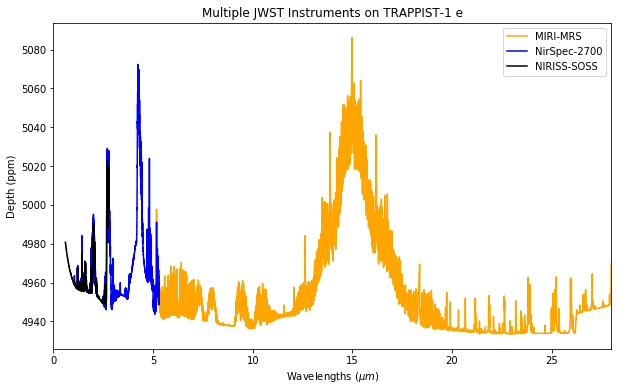

In [55]:
fig = plt.figure(figsize=(10,6))
ax = fig.gca()
ax.step(miriw, mirid, label="MIRI-MRS", c="orange", where="post")
ax.step(nirw, nird, label="NirSpec-2700", c="b", where="post")
ax.step(niriw, nirid, label="NIRISS-SOSS", c="k", where="post")
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Depth (ppm)")
ax.set_title("Multiple JWST Instruments on TRAPPIST-1 e")
ax.set_xlim(0,28)
ax.legend()
fig.savefig("combined_instruments_test.png")

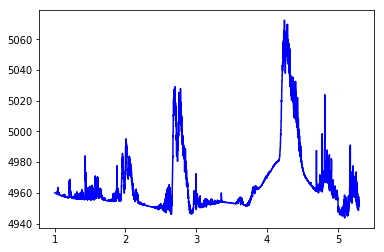

In [38]:
plt.step(nirw, nird, label="NirSpec-2700", c="b", where="post")

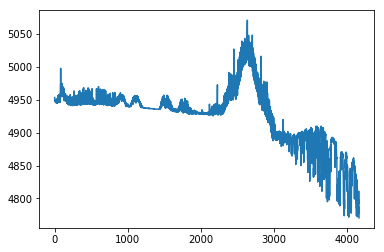

In [67]:
plt.plot((-x.Planet)/x.Stellar*1e6)

# 2018-06-07
Given Eric's new file format, I'm starting to work with the actual atmosphere profile

## NIRSpec

In [117]:
s.reload(PSG)
nir = PSG.PSG("Gatlin b", gcmfiles[0], is_earth=True,
            atmosphere_ceiling=1e-6, n_uplayers=7)
nir.calculate(skprow=11)

Calculating Planet Data
    Planet not found. Inupts must be given manually.
    Using terminator profile


In [118]:
# Input custom values
nir.planet_data["SemiMajorAxis"] = 0.1
nir.planet_data["Inclination"] = 90.
nir.planet_data["Insolation"] = 1650.
nir.star_data["Temperature"] = 3300.
nir.star_data["SRadius"] = 0.137
nir.star_data["Magnitude"] = 14
nir.star_data["Mass"] = 0.25

In [119]:
nir.write(scope="NIRSpec-2700", exposure_count=110, exposure_time=4,
        rad_units="rel")
nir.send()
nir.plot_setup()

    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for ExoEarth like Gatlin b
    The file's name is t3300_s1650_p19.5724_terminator_NIRSpec-2700_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Requested aerosol size (14.000 um) is out of range (0.010-10.000 um) for 'Cloud - White'.

4504
Ready to Make Plots


## MIRI

In [120]:
miri = PSG.PSG("Gatlin b", gcmfiles[0], is_earth=True,
               atmosphere_ceiling=1e-6, n_uplayers=7)
miri.calculate(skprow=11)

Calculating Planet Data
    Planet not found. Inupts must be given manually.
    Using terminator profile


In [121]:
# Input custom values
miri.planet_data["SemiMajorAxis"]
miri.planet_data["Inclination"] = 90.
miri.planet_data["Insolation"] = 1650.
miri.star_data["Temperature"] = 3300.
miri.star_data["SRadius"] = 0.137
miri.star_data["Magnitude"] = 14
miri.star_data["Mass"] = 0.25

In [122]:
miri.write(scope="MIRI-MRS", exposure_count=110, exposure_time=12,
        rad_units="rel")
miri.send()
miri.plot_setup()

    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for ExoEarth like Gatlin b
    The file's name is t3300_s1650_p19.5724_terminator_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Requested aerosol size (14.000 um) is out of range (0.010-10.000 um) for 'Cloud - White'.

4162
Ready to Make Plots


In [123]:
nirc = PSG.PSG("Gatlin b", gcmfiles[0], is_earth=True,
               atmosphere_ceiling=1e-6, n_uplayers=7)
nirc.calculate(skprow=11)

Calculating Planet Data
    Planet not found. Inupts must be given manually.
    Using terminator profile


In [124]:
# Input custom values
nirc.planet_data["SemiMajorAxis"]
nirc.planet_data["Inclination"] = 90.
nirc.planet_data["Insolation"] = 1650.
nirc.star_data["Temperature"] = 3300.
nirc.star_data["SRadius"] = 0.137
nirc.star_data["Magnitude"] = 14
nirc.star_data["Mass"] = 0.25

In [125]:
nirc.write(scope="NIRCam-Grism", exposure_count=110, exposure_time=1,
        rad_units="rel")
nirc.send()
nirc.plot_setup()

    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for ExoEarth like Gatlin b
    The file's name is t3300_s1650_p19.5724_terminator_NIRCam-Grism_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Requested aerosol size (14.000 um) is out of range (0.010-10.000 um) for 'Cloud - White'.

1110
Ready to Make Plots


In [126]:
soss = PSG.PSG("Gatlin b", gcmfiles[0], is_earth=True,
               atmosphere_ceiling=1e-6, n_uplayers=7)
soss.calculate(skprow=11)

Calculating Planet Data
    Planet not found. Inupts must be given manually.
    Using terminator profile


In [127]:
# Input custom values
soss.planet_data["SemiMajorAxis"]
soss.planet_data["Inclination"] = 90.
soss.planet_data["Insolation"] = 1650.
soss.star_data["Temperature"] = 3300.
soss.star_data["SRadius"] = 0.137
soss.star_data["Magnitude"] = 14
soss.star_data["Mass"] = 0.25

In [128]:
soss.write(scope="NIRISS-SOSS", exposure_count=110, exposure_time=3,
        rad_units="rel")
soss.send()
soss.plot_setup()

    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for ExoEarth like Gatlin b
    The file's name is t3300_s1650_p19.5724_terminator_NIRISS-SOSS_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    8 files created
    PSG returned an error or warning:
WARNING | PUMAS | Requested aerosol size (14.000 um) is out of range (0.010-10.000 um) for 'Cloud - White'.

1080
Ready to Make Plots


In [129]:
background = PSG.PSG("Gatlin b", gcmfiles[0], is_earth=True,
                     atmosphere_ceiling=1e-6, n_uplayers=7)
background.calculate()
background.zero_atmosphere()

Calculating Planet Data
    Planet not found. Inupts must be given manually.
    Using terminator profile


In [130]:
# Input custom values
background.planet_data["SemiMajorAxis"]
background.planet_data["Inclination"] = 90.
background.planet_data["Insolation"] = 1650.
background.star_data["Temperature"] = 3300.
background.star_data["SRadius"] = 0.137
background.star_data["Magnitude"] = 14
background.star_data["Mass"] = 0.25

In [131]:
background.write(scope="MIRI-MRS", exposure_time=12, exposure_count=110,
                rad_units="rel")
background.send()
background.plot_setup()

    Successfully added 7 layers to the atmosphere
    Successfully created PSG Config file from GCM results for ExoEarth like Gatlin b
    The file's name is t3300_s1650_p19.5724_terminator_psginput.txt
Sending to PSG
    Successfully connected to NASA PSG
    5 files created
    PSG returned an error or warning:
ERROR | PUMAS | Atmospheric pressure is incorrect.

4162
Ready to Make Plots


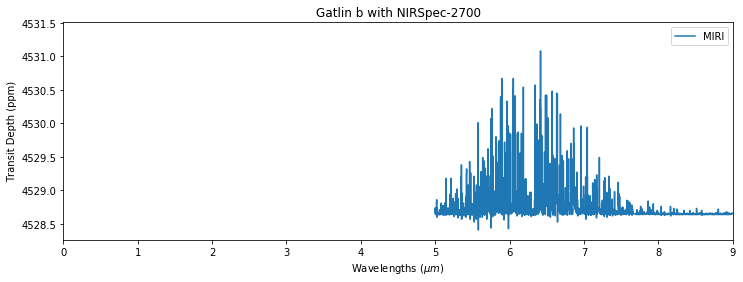

In [133]:
fig = plt.figure(figsize=(12, 4))
ax = fig.gca()
#ax.step(nir.Wavelengths, nir.Transit*1e6, label="NIRSpec")
ax.step(miri.Wavelengths, miri.Transit*1e6-background.Transit*1e6, label="MIRI")
#ax.step(nirc.Wavelengths, nirc.Transit*1e6, label="NIRCam")
#ax.step(soss.Wavelengths, soss.Transit*1e6, label="NIRI-SOSS")
ax.set_title("Gatlin b with NIRSpec-2700")
ax.set_xlabel("Wavelengths ($\mu m$)")
ax.set_ylabel("Transit Depth (ppm)")
ax.set_xlim(0,9)
ax.legend()

In [116]:
np.logical_or(np.array(miri.atmosphere.keys()) != "Layer",
              np.array(miri.atmosphere.keys()) != "Heights")

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [99]:
miri.atmosphere.keys()

['Layer',
 'Height',
 'Pressure',
 'Temperature',
 'N2',
 'CO2',
 'H2O',
 'LiquidCloud',
 'IceCloud',
 'LiquidCloudSize',
 'IceCloudSize']